In [ ]:
#Importing Important Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
import joblib

In [2]:
#import dataset

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d prachi13/customer-analytics

Dataset URL: https://www.kaggle.com/datasets/prachi13/customer-analytics
License(s): other
  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 86.3MB/s]


In [5]:
!unzip '/content/customer-analytics.zip'

Archive:  /content/customer-analytics.zip
  inflating: Train.csv               


In [6]:
data = pd.read_csv(r"/content/Train.csv")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
#Columns that determine delivery times:
#1. Mode Of Shipment
#2. Product Importance
#3. Weight in gms (maybe)?

#To Predict:
#Reached.on.Time_Y.N

In [8]:
data.shape

(10999, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### DATA PREPROCESSING

In [11]:
print(data['Warehouse_block'].unique())
print(data['Mode_of_Shipment'].unique())
print(data['Product_importance'].unique())
print(data['Gender'].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [12]:
print(f"{data['Warehouse_block'].value_counts()}+\n")
print(f"{data['Mode_of_Shipment'].value_counts()}+\n")
print(f"{data['Product_importance'].value_counts()}+\n")
print(f"{data['Gender'].value_counts()}")

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64+

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64+

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64+

Gender
F    5545
M    5454
Name: count, dtype: int64


In [13]:
#Now We have to encode the object type data

ENCODING


In [14]:
names = data.columns
names

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [15]:
print(data['Reached.on.Time_Y.N'].value_counts()) #No need to balance undersampling or oversampling

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


Text(0, 0.5, 'frequency')

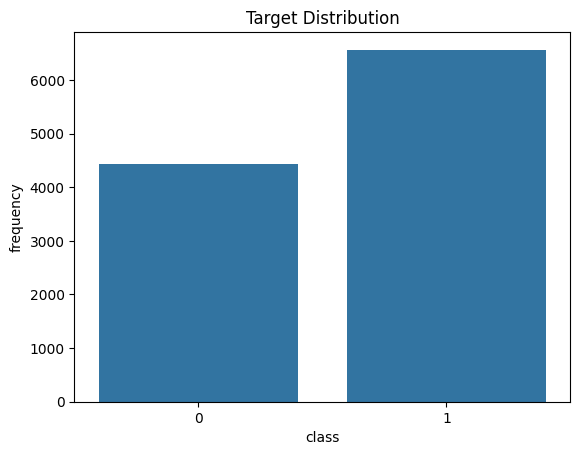

In [16]:
sns.countplot(x=data['Reached.on.Time_Y.N'],data=data)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

In [17]:
# joblib.dump(le, 'warehouse_le.pkl')
# joblib.dump(le, 'shipment_le.pkl')
# joblib.dump(le, 'importance_le.pkl')

In [18]:
#Columns to encode: "Warehouse_Block", "Mode_of_Shipment", "Product_importance", "Gender"

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
data['Warehouse_block']=le.fit_transform(data['Warehouse_block'])
data['Mode_of_Shipment']=le.fit_transform(data['Mode_of_Shipment'])
data['Product_importance']=le.fit_transform(data['Product_importance'])
data['Gender']=le.fit_transform(data['Gender'])

In [22]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


REMOVING UNNECCESARY COLUMNS


In [23]:
print(data['Customer_rating'].value_counts())

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64


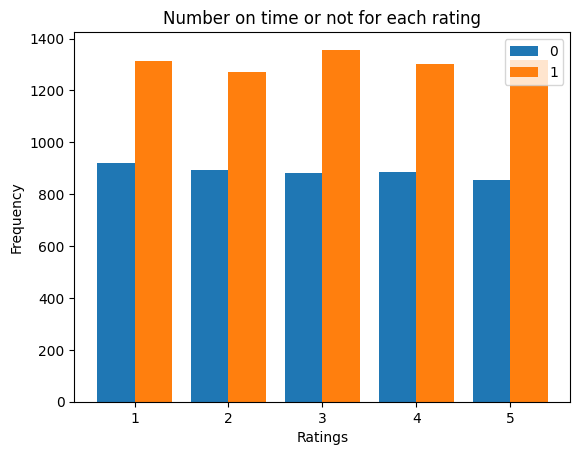

In [24]:
frequency_data = data.groupby([data['Customer_rating'], data['Reached.on.Time_Y.N']]).size().unstack(fill_value=0)

# Plotting the bar chart
X = frequency_data.index
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, frequency_data[0], 0.4, label='0')
plt.bar(X_axis + 0.2, frequency_data[1], 0.4, label='1')

plt.xticks(X_axis, X)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Number on time or not for each rating")
plt.legend()
plt.show()

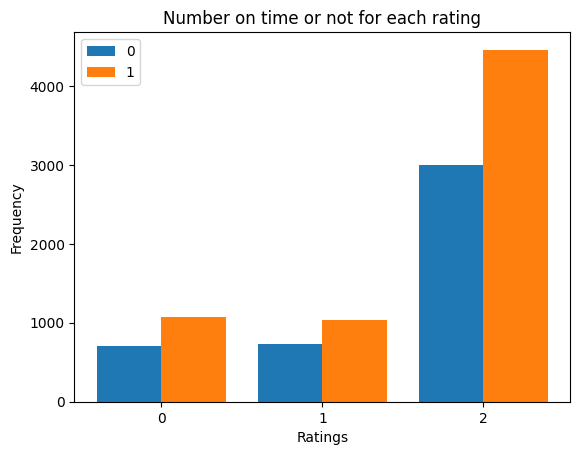

In [25]:
frequency_data = data.groupby([data['Mode_of_Shipment'], data['Reached.on.Time_Y.N']]).size().unstack(fill_value=0)

# Plotting the bar chart
X = frequency_data.index
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, frequency_data[0], 0.4, label='0')
plt.bar(X_axis + 0.2, frequency_data[1], 0.4, label='1')

plt.xticks(X_axis, X)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Number on time or not for each rating")
plt.legend()
plt.show()

In [26]:
data.corr()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.000070,-0.002459,0.188998,-0.005722,0.196791,0.145369,0.029081,-0.001695,-0.598278,0.278312,-0.411822
Warehouse_block,0.000070,1.000000,0.000617,0.014496,0.010169,-0.006679,-0.005262,0.004260,-0.003700,0.009569,0.004086,0.005214
Mode_of_Shipment,-0.002459,0.000617,1.000000,-0.020164,0.001679,0.006681,-0.001640,0.004911,-0.011288,0.009364,-0.000797,-0.000535
Customer_care_calls,0.188998,0.014496,-0.020164,1.000000,0.012209,0.323182,0.180771,0.006273,0.002545,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.010169,0.001679,0.012209,1.000000,0.009270,0.013179,0.003157,0.002775,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,-0.006679,0.006681,0.323182,0.009270,1.000000,0.123676,0.006366,0.019759,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,-0.005262,-0.001640,0.180771,0.013179,0.123676,1.000000,0.003662,-0.009395,-0.082769,-0.168213,-0.055515
Product_importance,0.029081,0.004260,0.004911,0.006273,0.003157,0.006366,0.003662,1.000000,-0.009865,-0.006251,0.001652,-0.023483
Gender,-0.001695,-0.003700,-0.011288,0.002545,0.002775,0.019759,-0.009395,-0.009865,1.000000,-0.011777,0.003573,0.004689
Discount_offered,-0.598278,0.009569,0.009364,-0.130750,-0.003124,-0.138312,-0.082769,-0.006251,-0.011777,1.000000,-0.376067,0.397108


<Axes: >

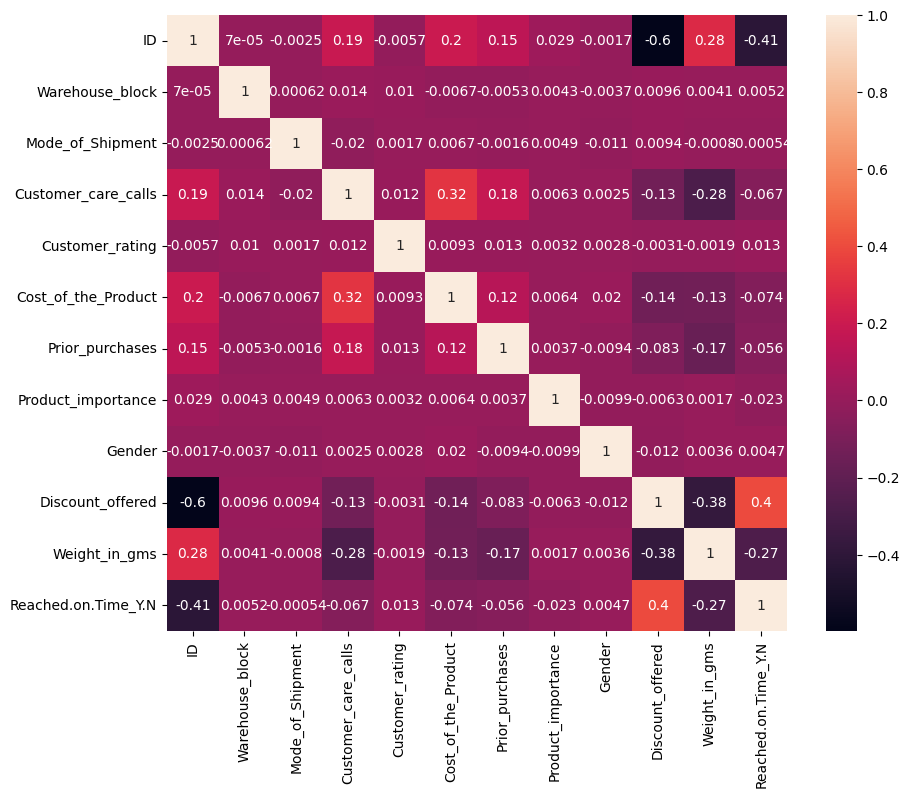

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [28]:
2#We need to see if there is signficant correlation with last column

2

In [29]:
#Definite determinants:
# Warehouse Block
# Mode of Shipment
# Product Importance
# Weight in grams
# Customer Care Calls

In [30]:
#Columns to drop:
# ID
# Gender
# Discount Offered
# Cost of the Product
# Prior Purchase
# Customer Rating

In [31]:
data_updated = data.drop(['ID','Gender','Discount_offered','Cost_of_the_Product','Prior_purchases','Customer_rating'],axis=1)

In [32]:
data_updated.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,1,1233,1
1,4,0,4,1,3088,1
2,0,0,2,1,3374,1
3,1,0,3,2,1177,1
4,2,0,2,2,2484,1


VISUALISATION AND HANDLING OUTLIERS

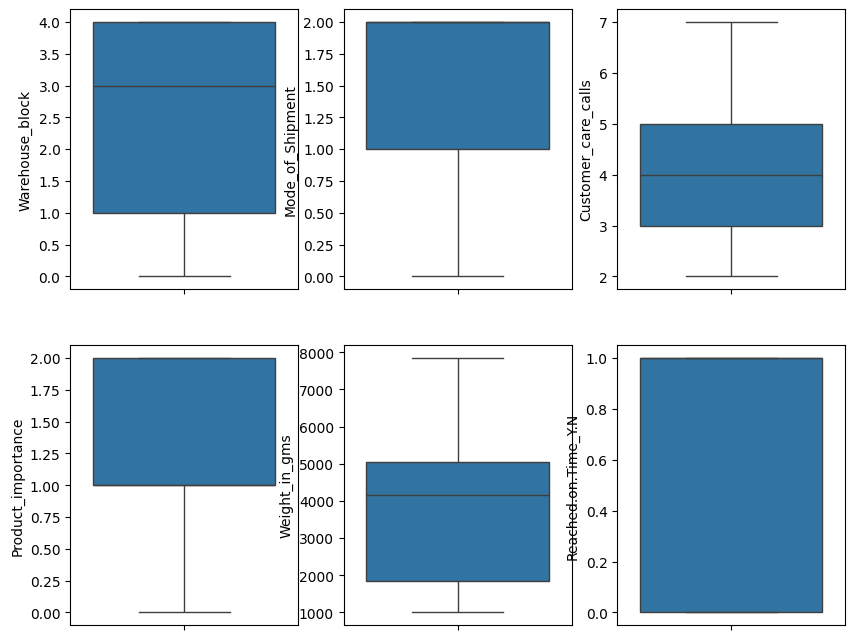

In [33]:
plt.figure(figsize=(10,8))
for i in data_updated.columns:
  plt.subplot(2,3,data_updated.columns.get_loc(i)+1)
  sns.boxplot(data_updated[i])

array([[<Axes: title={'center': 'Warehouse_block'}>,
        <Axes: title={'center': 'Mode_of_Shipment'}>],
       [<Axes: title={'center': 'Customer_care_calls'}>,
        <Axes: title={'center': 'Product_importance'}>],
       [<Axes: title={'center': 'Weight_in_gms'}>,
        <Axes: title={'center': 'Reached.on.Time_Y.N'}>]], dtype=object)

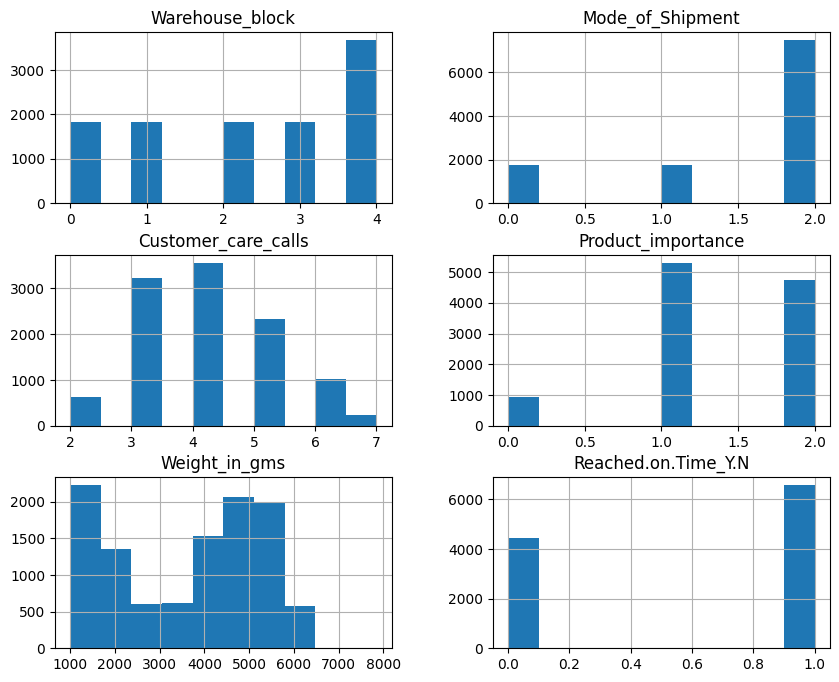

In [34]:
data_updated.hist(figsize=(10,8))

In [35]:
data_updated.describe(include='all')

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,1.516865,4.054459,1.346031,3634.016729,0.596691
std,1.490726,0.756894,1.141490,0.631434,1635.377251,0.490584
min,0.000000,0.000000,2.000000,0.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,1.000000,1839.500000,0.000000
50%,3.000000,2.000000,4.000000,1.000000,4149.000000,1.000000
75%,4.000000,2.000000,5.000000,2.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,2.000000,7846.000000,1.000000


HANDLING SAMPLING

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
us = RandomUnderSampler(random_state=0)

In [38]:
x = data_updated.drop(['Reached.on.Time_Y.N'], axis=1)

In [39]:
y = data_updated['Reached.on.Time_Y.N']

In [40]:
x_res, y_res=us.fit_resample(x, y)

In [41]:
x_res.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Weight_in_gms
0,1,1,6,2,5031
1,2,1,3,1,5956
2,4,1,4,0,4245
3,3,1,4,2,4622
4,0,1,3,2,4732


In [42]:
y_res.head()

0    0
1    0
2    0
3    0
4    0
Name: Reached.on.Time_Y.N, dtype: int64

Text(0, 0.5, 'frequency')

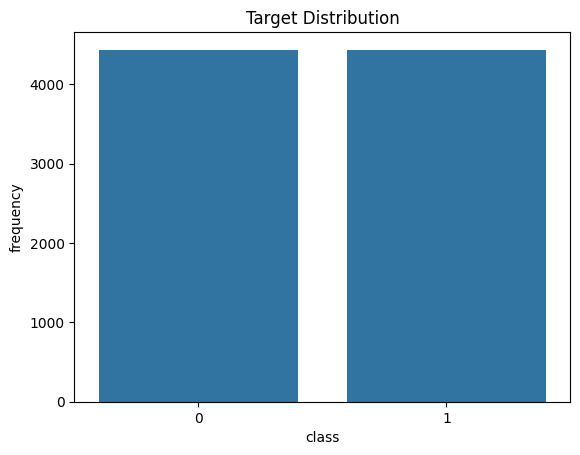

In [43]:
sns.countplot(x=y_res,data=data_updated)
plt.title('Target Distribution')
plt.xlabel('class')
plt.ylabel('frequency')

MODELS TO USE FOR CLASSIFICATION


In [44]:
# y=data['Reached.on.Time_Y.N']
# y

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
scaler = StandardScaler()
#Balanced data
X_scaled = pd.DataFrame(scaler.fit_transform(x_res), columns=x_res.columns, index=x_res.index)

In [47]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [48]:
# scaler = StandardScaler()
# #UnBalanced data
# X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)

In [49]:
X_scaled

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Weight_in_gms
0,-0.887600,-0.679951,1.690326,1.033640,0.802222
1,-0.217405,-0.679951,-0.929315,-0.554042,1.366725
2,1.122984,-0.679951,-0.056101,-2.141724,0.322546
3,0.452789,-0.679951,-0.056101,1.033640,0.552620
4,-1.557794,-0.679951,-0.929315,1.033640,0.619750
...,...,...,...,...,...
8867,-0.887600,0.637482,-0.929315,1.033640,-1.592494
8868,-1.557794,-0.679951,-0.056101,-0.554042,0.981032
8869,1.122984,-1.997383,-0.056101,1.033640,0.254196
8870,-0.217405,0.637482,-0.929315,-0.554042,-0.902884


In [50]:
# pca = PCA()
# pca_result = pca.fit_transform(X_scaled)

In [51]:
# pca_result

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled, y_res, test_size=0.2, random_state=0)

In [54]:
x_train.size

35485

In [55]:
x_test.size

8875

In [56]:
y_train.head()

214     0
2293    0
8606    1
7685    1
70      0
Name: Reached.on.Time_Y.N, dtype: int64

## MODEL TRAINING

In [57]:
#MODELS TO TEST
# Logistic Regression
# KNN
# SVM
# Decision Tree

In [58]:
#pip install xgboost

In [59]:
#INITIALISING MULTIPLE MODELS

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

from sklearn.svm import SVC
model = SVC(kernel="linear")

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=7, criterion='entropy',random_state=0)

import xgboost as xgb
xg = xgb.XGBClassifier()

In [60]:
#Fitting x_train and y_train

lr.fit(x_train, y_train)

knn.fit(x_train, y_train)

model.fit(x_train, y_train)

nb.fit(x_train, y_train)

rf.fit(x_train, y_train)

xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
#predictions

pred_lr = lr.predict(x_test)

pred_knn = knn.predict(x_test)

pred_model = model.predict(x_test)

pred_nb = nb.predict(x_test)

pred_rf = rf.predict(x_test)

pred_xg = xg.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
cr_lr = classification_report(y_test, pred_lr)
cr_knn = classification_report(y_test, pred_knn)
cr_svc = classification_report(y_test, pred_model)
cr_nb = classification_report(y_test, pred_nb)
cr_rf = classification_report(y_test, pred_rf)
cr_xg = classification_report(y_test, pred_xg)

In [64]:
as_lr = accuracy_score(y_test, pred_lr)
as_knn = accuracy_score(y_test, pred_knn)
as_svc = accuracy_score(y_test, pred_model)
as_nb = accuracy_score(y_test, pred_nb)
as_rf = accuracy_score(y_test, pred_rf)
as_xg = accuracy_score(y_test, pred_xg)

In [65]:
cm_lr = confusion_matrix(y_test, pred_lr)
cm_knn = confusion_matrix(y_test, pred_knn)
cm_svc = confusion_matrix(y_test, pred_model)
cm_nb = confusion_matrix(y_test, pred_nb)
cm_rf = confusion_matrix(y_test, pred_rf)
cm_xg = confusion_matrix(y_test, pred_xg)

In [66]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Metrics", "Logistic Regression", "KNN", "SVC", "Naive Bayes", "Random Forest", "XGBoost"])

# Add rows
myTable.add_row(["Classification Report", cr_lr, cr_knn, cr_svc, cr_nb, cr_rf, cr_xg])
myTable.add_row(["Accuracy Score", as_lr, as_knn, as_svc, as_nb, as_rf, as_xg])
myTable.add_row(["Confusion Matrix", cm_lr, cm_knn, cm_svc, cm_nb, cm_rf, cm_xg])
print(myTable)

+-----------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+
|        Metrics        |                  Logistic Regression                  |                          KNN                          |                          SVC                          |                      Naive Bayes                      |                     Random Forest                     |                        XGBoost                        |
+-----------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+---------------------------

In [67]:
# pip install xgboost h5py

In [68]:
# import h5py
# import pickle

In [69]:
# with h5py.File('xgboost_model.h5', 'w') as f:
#     # Pickle the model to a binary string
#     model_binary = pickle.dumps(xg)
#     # Save the binary string as a dataset in the HDF5 file
#     f.create_dataset('xgboost_model', data=model_binary)

In [124]:
# xg.save_model('xgboost_model.model')

In [71]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


ARTIFICIAL NEURAL NETWORK

In [72]:
x_arr = np.array(X_scaled)
y_arr = np.array(y_res)

print(x_arr)
print(y_arr)

[[-0.8875997  -0.67995067  1.69032581  1.03363955  0.80222185]
 [-0.21740527 -0.67995067 -0.92931503 -0.55404225  1.36672546]
 [ 1.12298358 -0.67995067 -0.05610142 -2.14172405  0.32254634]
 ...
 [ 1.12298358 -1.99738294 -0.05610142  1.03363955  0.25419564]
 [-0.21740527  0.6374816  -0.92931503 -0.55404225 -0.90288421]
 [ 1.12298358 -1.99738294  0.8171122   1.03363955 -1.17628704]]
[0 0 0 ... 1 1 1]


In [73]:
x_train_ANN,x_test_ANN,y_train_ANN,y_test_ANN=train_test_split(x_arr, y_arr, test_size=0.2, random_state=0)

In [74]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [75]:
model = Sequential()

In [76]:
x_train_ANN.shape

(7097, 5)

In [77]:
model.add(Dense(units = 16,kernel_initializer = 'random_uniform',activation = 'relu')) #input layer

In [78]:
model.add(Dense(units =16,kernel_initializer = 'random_uniform',activation = 'relu')) # 1st hidden layer

In [79]:
model.add(Dense(units =8,kernel_initializer = 'random_uniform',activation = 'relu')) # 1st hidden layer

In [80]:
model.add(Dense(units = 1 ,kernel_initializer = 'random_uniform' ,activation = 'sigmoid')) #Output Layer

In [81]:
model.compile (optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [82]:
model.fit(x_train_ANN, y_train_ANN, batch_size=32, epochs = 250)

Epoch 1/250
222/222 [==============================] - 5s 3ms/step - loss: 0.6706 - accuracy: 0.6108
Epoch 2/250
222/222 [==============================] - 1s 4ms/step - loss: 0.6149 - accuracy: 0.6677
Epoch 3/250
222/222 [==============================] - 1s 3ms/step - loss: 0.6051 - accuracy: 0.6786
Epoch 4/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5990 - accuracy: 0.6775
Epoch 5/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5937 - accuracy: 0.6811
Epoch 6/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5874 - accuracy: 0.6871
Epoch 7/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5813 - accuracy: 0.6954
Epoch 8/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5748 - accuracy: 0.6965
Epoch 9/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5698 - accuracy: 0.6983
Epoch 10/250
222/222 [==============================] - 1s 3ms/step - loss: 0.5646 - accura

In [83]:
y_pred_prob = model.predict(x_test_ANN)
y_pred_ANN = (y_pred_prob > 0.5).astype(int)

56/56 [==============================] - 0s 3ms/step


In [84]:
y_pred_ANN

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [85]:
y_test_ANN.flatten()

array([0, 1, 0, ..., 0, 0, 1])

In [86]:
y_test_ANN[0]

0

In [87]:
y_pred_ANN[0]

array([0])

In [88]:
ANN_cr = classification_report(y_test_ANN, y_pred_ANN)
ANN_as = accuracy_score(y_test_ANN, y_pred_ANN)
ANN_cm = confusion_matrix(y_test_ANN, y_pred_ANN)

In [89]:
print(f"{ANN_cr}\n{ANN_as}\n{ANN_cm}")

              precision    recall  f1-score   support

           0       0.64      0.93      0.76       872
           1       0.88      0.49      0.63       903

    accuracy                           0.71      1775
   macro avg       0.76      0.71      0.70      1775
weighted avg       0.76      0.71      0.69      1775

0.708169014084507
[[811  61]
 [457 446]]


F1 Scores

In [90]:
from sklearn.metrics import f1_score

In [91]:
print(f"Logistic Regression: {f1_score(y_test, pred_lr)}")
print(f"KNN: {f1_score(y_test, pred_knn)}")
print(f"SVC: {f1_score(y_test, pred_model)}")
print(f"Gaussian NB: {f1_score(y_test, pred_nb)}")
print(f"Random Forest: {f1_score(y_test, pred_rf)}")
print(f"XG Boost: {f1_score(y_test, pred_xg)}")
print(f"ANN: {f1_score(y_test_ANN, y_pred_ANN)}")

Logistic Regression: 0.64314171883893
KNN: 0.6251497005988024
SVC: 0.6428571428571428
Gaussian NB: 0.6536643026004728
Random Forest: 0.6425339366515836
XG Boost: 0.6463642013673089
ANN: 0.6326241134751772


## MODEL TESTING

HYPERPARAMETER TUNING

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# BEST MODELS :
# SVC - 66.76%
# Gaussian NB - 66.98%
# XG Boost - 67.94%
# KNN - 64.73%

SVC

In [94]:
parameters={
    'kernel':['rbf','linear'],
    'C':[0.1,0.5,1.0],
    'gamma':[0.01,0.0001]
}
RCV_SVC  = RandomizedSearchCV(estimator=SVC(),param_distributions=parameters,cv=6,n_iter=12,verbose=2)

In [95]:
RCV_SVC.fit(x_train,y_train)

Fitting 6 folds for each of 12 candidates, totalling 72 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   2.1s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.4s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END ...................C=0.1, gamma=0.01, k

RandomizedSearchCV(cv=6, estimator=SVC(), n_iter=12,
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'gamma': [0.01, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=2)

In [96]:
RCV_SVC.best_score_

0.6674665631127951

In [97]:
RCV_SVC.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1.0}

In [98]:
Opt_SVC=SVC(kernel='rbf', gamma=0.01, C=1.0)

In [99]:
Opt_SVC.fit(x_train, y_train)

SVC(gamma=0.01)

In [100]:
opt_pred_SVC=Opt_SVC.predict(x_test)

In [101]:
print(f"accuracy score = {accuracy_score(y_test, opt_pred_SVC)}")
print(f"F1 score = {f1_score(y_test, opt_pred_SVC)}")
print(f"conf_mat = \n{confusion_matrix(y_test, opt_pred_SVC)}")

accuracy score = 0.6732394366197183
F1 score = 0.6424167694204685
conf_mat = 
[[674 198]
 [382 521]]


Gaussian NB

In [102]:
parameters={
    'priors':[None],
    'var_smoothing':[1e-9, 1e-5, 1e-7]
}

RCV_GNB  = RandomizedSearchCV(estimator=GaussianNB(),param_distributions=parameters,cv=10,n_iter=6,verbose=2)

In [103]:
RCV_GNB.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-09; total time=   0.0s
[CV] END ...................priors=None, var_smoothing=1e-05; total time=   0.0s
[CV] END ...................priors=None, var_smo

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=6. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=GaussianNB(), n_iter=6,
                   param_distributions={'priors': [None],
                                        'var_smoothing': [1e-09, 1e-05, 1e-07]},
                   verbose=2)

In [104]:
RCV_GNB.best_score_

0.6630970023242416

In [105]:
RCV_GNB.best_params_

{'var_smoothing': 1e-09, 'priors': None}

In [106]:
opt_GNB=GaussianNB()

In [107]:
opt_GNB.fit(x_train, y_train)

GaussianNB()

In [108]:
opt_pred_GNB=opt_GNB.predict(x_test)

In [109]:
print(f"accuracy score = {accuracy_score(y_test, opt_pred_GNB)}")
print(f"F1 score = {f1_score(y_test, opt_pred_GNB)}")
print(f"conf_mat = \n{confusion_matrix(y_test, opt_pred_GNB)}")

accuracy score = 0.6698591549295775
F1 score = 0.6536643026004728
conf_mat = 
[[636 236]
 [350 553]]


XG Boost

In [110]:
parameters={
    'booster':['gbtree','gblinear','dart'],
}

RVC_XGB = RandomizedSearchCV(estimator=xgb.XGBClassifier(),param_distributions=parameters,cv=10,n_iter=3,verbose=2)

In [111]:
RVC_XGB.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END .....................................booster=gbtree; total time=   0.1s
[CV] END ...................................booster=gblinear; total time=   0.1s
[CV] END ...................................boos

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=3,
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart']},
                   verbose=2)

In [112]:
RVC_XGB.best_score_

0.667466775263712

In [113]:
RVC_XGB.best_params_

{'booster': 'gbtree'}

KNN

In [114]:
parameters={
    'n_neighbors':[23,25,27,29],
    'weights':['uniform',],
    'algorithm':['auto'],
    'p':[2]
}

RVC_KNN = RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=parameters,cv=6,n_iter=14,verbose=2)

In [115]:
RVC_KNN.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=14. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 6 folds for each of 4 candidates, totalling 24 fits
[CV] END algorithm=auto, n_neighbors=23, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=23, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=23, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=23, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=23, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=23, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=2

RandomizedSearchCV(cv=6, estimator=KNeighborsClassifier(), n_iter=14,
                   param_distributions={'algorithm': ['auto'],
                                        'n_neighbors': [23, 25, 27, 29],
                                        'p': [2], 'weights': ['uniform']},
                   verbose=2)

In [116]:
RVC_KNN.best_score_

0.6833884476406928

In [117]:
RVC_KNN.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 25, 'algorithm': 'auto'}

In [118]:
Opt_KNN=KNeighborsClassifier(weights='uniform',p=2,n_neighbors=25,algorithm='auto')

In [119]:
Opt_KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [120]:
opt_pred_KNN=Opt_KNN.predict(x_test)

In [121]:
print(f"accuracy score = {accuracy_score(y_test, opt_pred_KNN)}")
print(f"F1 score = {f1_score(y_test, opt_pred_KNN)}")
print(f"conf_mat = \n{confusion_matrix(y_test, opt_pred_KNN)}")

accuracy score = 0.68
F1 score = 0.6377551020408163
conf_mat = 
[[707 165]
 [403 500]]


BEST MODEL - ANN

In [122]:
#Saving ANN model

In [123]:
model.save('ECommerce_ANN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
